In [1]:
# Import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Non-linear transformations

Sometimes the output variable doesn't have a direct linear relationship with the predictor variable. They can have quadratic, exponential, logarithmic, or polynomial relationships. In such cases, transforming the variable comes in very handy.

The following is a rough guideline on how to spot and handle non-linear relationships:

- Plot a scatter plot of the output variable with each of the predictor variables.
- If the scatter plot assumes more or less a linear shape then it is linearly related to the output variable.
- If the scatter plot assumes a characteristic non-linear shape then transform the variable by applying that function.

Let's illustrate this with an example. We will use the `auto.csv` dataset for this. This dataset contains information about miles per gallon (mpg) and horsepower for a number of car models. `mpg` is the predictor variable.

Let's import the dataset and take a look at the relationship between `horsepower` and `mpg`:

In [2]:
# Import `auto` as a pandas dataframe
github_path = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_path + 'main/w9-regression/'
# dat_dir = './'

auto = pd.read_csv(dat_dir + 'auto.csv')
auto.head()
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


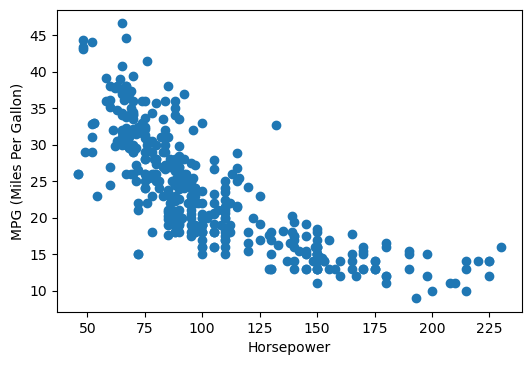

In [3]:
# Create scatter plot to show relationship between horsepower and mpg
plt.figure(dpi=100)
plt.plot(auto['horsepower'], auto['mpg'], 'o')
plt.xlabel('Horsepower')
plt.ylabel('MPG (Miles Per Gallon)')

plt.show()

# plt.savefig('MPG-power.png')
 

The relationship between `horsepower` and `mpg` doesn't seem to have a linear shape.

However, for the sake of comparison, let's try and fit a linear model first – i.e. assume that the model is:

$$\text{mpg}= \alpha +  \beta_1*\text{horsepower}$$ 

In [4]:
# Intialise and fit linear regression model
X = auto['horsepower']
Y = auto['mpg']
lm = LinearRegression()
lm.fit(X[:, np.newaxis], Y)   # see note below

print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')

alpha = 39.93586102117047
betas = [-0.15784473]


<ipython-input-4-f879f2e3198c>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(X[:, np.newaxis], Y)   # see note below


> Note that the linear regression method by default requires that *X* be an array of two dimensions. Using `np.newaxis`, we can create a new dimension for it to function properly.

The line of best fit can be plotted by the following snippet:

<ipython-input-5-3b4e713045b3>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, lm.predict(X[:, np.newaxis]))


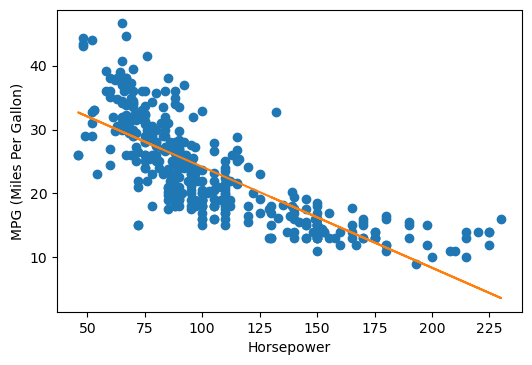

In [5]:
# Create scatter plot to show relationship between horsepower and mpg and predictions
plt.figure(dpi=100)
plt.plot(auto['horsepower'], auto['mpg'], 'o')
plt.plot(X, lm.predict(X[:, np.newaxis]))
plt.xlabel('Horsepower')
plt.ylabel('MPG (Miles Per Gallon)')

plt.show()

This model is not very efficient – the *R<sup>2</sup>* for this model is 0.6059, and the RSE is 4.9058 (20.92%) error. See below. 

In [6]:
# Calculate R2 score
R2=lm.score(X[:, np.newaxis], Y) 
print(f'R2 = {R2}\n')

# Calculate RSE and error
auto['mpg_pred1'] = lm.predict(X[:, np.newaxis])  
auto['SSD1'] = (auto['mpg'] - auto['mpg_pred1'])**2
SSD1 = auto['SSD1'].sum()
RSE1 = np.sqrt(SSD1 / (392-1-1))   # n = 392, p = 1
mpgmean = np.mean(auto['mpg'])
error1 = RSE1 / mpgmean
print(f'RSE = {RSE1}\nMean mpg = {mpgmean}\nError = {np.round(error1, 4)*100}%')


R2 = 0.6059482578894348

RSE = 4.90575691954594
Mean mpg = 23.44591836734694
Error = 20.919999999999998%


<ipython-input-6-27865b2fc2fa>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2=lm.score(X[:, np.newaxis], Y)
<ipython-input-6-27865b2fc2fa>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  auto['mpg_pred1'] = lm.predict(X[:, np.newaxis])


From the scatter plot, it looks like the relationship between `horsepower` and `mpg` could linearised by taking the square-root of `horsepower` – if we assume a model in the form 
$$\text{mpg} =   \alpha +  \beta * \sqrt{\text{horsepower}}$$ 

The model may improve. Let’s give it a go!

In [7]:
# Transform X by taking the square root
X2 = np.sqrt(auto['horsepower'])
# X2 = np.log(auto['horsepower'])
Y2 = auto['mpg']
lm2 = LinearRegression()
lm2.fit(X2[:, np.newaxis], Y2)

print(f'alpha = {lm2.intercept_}')
print(f'beta = {lm2.coef_}')

alpha = 58.70517203721751
beta = [-3.50352375]


<ipython-input-7-68edf0a02391>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm2.fit(X2[:, np.newaxis], Y2)


In [8]:
# See if you can work out the R2, RSE, and error on your own!
# Calculate R2 score

# Calculate RSE and error


The *R<sup>2</sup>* value for this model comes out to be around 0.6437, and the RSE is 4.6648 (19.90% error) – a slight improvement!

Let’s plot our model to see how transforming `horsepower` has helped our prediction:

<ipython-input-9-b82f1b327353>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ypred = lm2.predict(X2[:, np.newaxis])


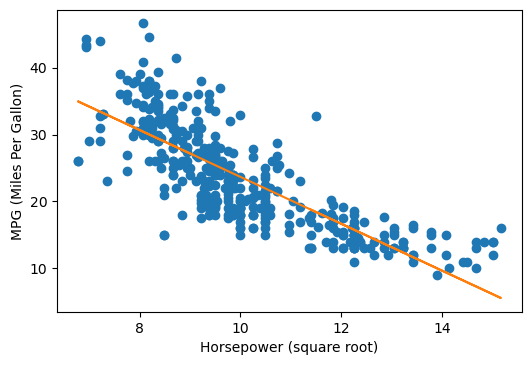

In [9]:
# Create scatter plot to show relationship between horsepower and mpg and predictions
ypred = lm2.predict(X2[:, np.newaxis])

plt.figure(dpi=100)
plt.plot(X2, Y2, 'o')
plt.plot(X2, ypred)
plt.xlabel('Horsepower (square root)')
# plt.xlabel('Horsepower (log)')
plt.ylabel('MPG (Miles Per Gallon)')

plt.show()

There is still room for improvement. The scatter plot shows that there is still a curve in our data. We may be able to improve our model by taking the log of `horsepower`, i.e. assuming an equation:

$$\text{mpg} =  \alpha +   \beta * \log(\text{horsepower}) $$ 

See if you can perform this **log-transform** on your own! 

In [10]:
# Transform X by taking the log - note: to take log, you can use np.log()

# Initialise and fit a linar regression model

# Print alpha and beta

# Calculate R2 score

# Calculate RSE and error


In [11]:
# Plot new prediction against log-transformed relationship


You should have found a *R<sup>2</sup>* of 0.6683, RSE of 4.5007 (19.19% error), and your plot should look like the following:
 
 **plot to be done**

Finally, we can try a model with a **polynomial fit** using `scikit-learn`'s `PolynomialFeatures` method. This allows us to **power-transform** X to a specified degree. We will try power-transforming `horsepower` to the second degree, i.e. assuming a model that can be written as:

$$\text{mpg} =  \alpha +\beta_1*  \text{horsepower}  +  \beta_2*\text{horsepower}^2$$

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)         # set number of degrees to 2
X4 = poly.fit_transform(X[:, np.newaxis])   # transform X
Y4 = auto['mpg']                            # Y remains un-transformed

# Intialise and fit new model
lm4 = LinearRegression()
lm4.fit(X4, Y4)

# Print parameters
print(f'alpha = {lm4.intercept_}')
print(f'beta = {lm4.coef_}')

alpha = 56.900099702112854
beta = [ 0.         -0.46618963  0.00123054]


<ipython-input-12-ca4199317776>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X4 = poly.fit_transform(X[:, np.newaxis])   # transform X


This gives us the model:

![](https://latex.codecogs.com/gif.latex?%5Ctext%7Bmpg%7D%20%3D%2056.9%20-0.4662%20*%5Ctext%7Bhorsepower%7D%20+%200.001*%5Ctext%7Bhorsepower%7D%5E2)

We end up with a model with the highest *R<sup>2</sup>* and lowest RSE and error percentage! 

In [13]:
# R-squared
print(f'R2 = {lm4.score(X4, Y4)}')

# RSE & Error
SSD = (Y4 - lm4.predict(X4))**2
RSE = np.sqrt(np.sum(SSD) / 389)
ymean = np.mean(Y4)
error = RSE / ymean
print(f'RSE = {RSE}\nError = {np.round(error, 4)*100}%')

R2 = 0.6875590305127517
RSE = 4.37392055336649
Error = 18.66%


Let’s try plotting this to see how our prediction looks:

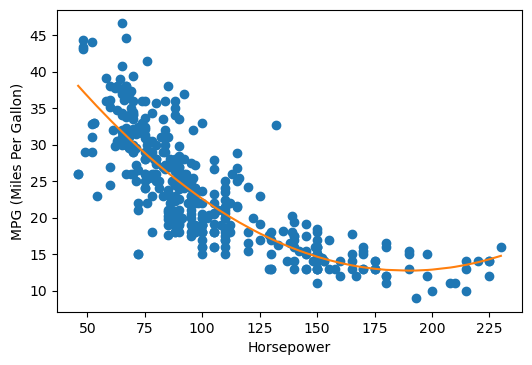

In [14]:
ypred = lm4.predict(X4)                    # store predictions
newX, newY = zip(*sorted(zip(X, ypred)))   # sort values for plotting

# Plot polynomial regression against original data
plt.figure(dpi=100)
plt.plot(X, Y, 'o')
plt.plot(newX, newY)
plt.xlabel('Horsepower')
plt.ylabel('MPG (Miles Per Gallon)')

plt.show()

Looks pretty good!

You can try to further improve the model by playing with the number of degrees in your polynomial regression i.e. by changing `poly = PolynomialFeatures(degree=n)`. Keep in mind, however, a higher degree may fit better on training data but be poor at generalising to other data (remember overfitting?). 

In [15]:
# Try to change the polynomial degree


We've talked about how to handle a lot of issues and other considerations in implementing linear regression models in this lesson! 